# Denoising 

In [9]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

In [35]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
encoded = Dense(128, activation='relu')(encoded)
encoded = Dense(28, activation='relu')(encoded)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(28, activation='relu')(encoded) # added
decoded = Dense(128, activation='sigmoid')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

#introducing noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=32,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_noisy))


Epoch 1/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7039 - val_loss: 0.7002
Epoch 2/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6968 - val_loss: 0.6933
Epoch 3/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6899 - val_loss: 0.6866
Epoch 4/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6834 - val_loss: 0.6802
Epoch 5/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6771 - val_loss: 0.6740
Epoch 6/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6710 - val_loss: 0.6681
Epoch 7/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6652 - val_loss: 0.6624
Epoch 8/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6596 - val_loss: 0.6570
Epoch 9/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6542 - val_loss: 0.6517
Epoch 10/100
1875/1875 [==============================] - 2s 1ms/step - l

Epoch 80/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4969 - val_loss: 0.4975
Epoch 81/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4967 - val_loss: 0.4973
Epoch 82/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4965 - val_loss: 0.4971
Epoch 83/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4964 - val_loss: 0.4969
Epoch 84/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4962 - val_loss: 0.4968
Epoch 85/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4960 - val_loss: 0.4966
Epoch 86/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4959 - val_loss: 0.4965
Epoch 87/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4957 - val_loss: 0.4963
Epoch 88/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4956 - val_loss: 0.4962
Epoch 89/100
1875/1875 [==============================] - 2s 1ms

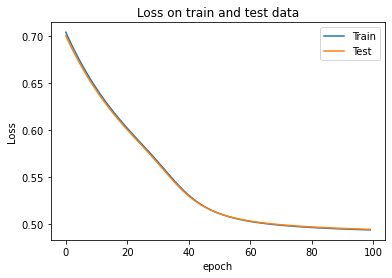

In [36]:
# plot the training history

plt.plot(autoencoder.history.history['loss'])
plt.plot(autoencoder.history.history['val_loss'])
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.title("Loss on train and test data")
plt.legend(['Train','Test'],loc='upper right')
plt.show()

In [38]:
decoded_images = autoencoder.predict(x_test_noisy)

In [42]:
# plot the test image
def validate_image(data):
    random_sample = np.random.choice(data.shape[0],1,replace = False)
    print(f"Tesing on image {random_sample[0]} \n")
    # plot test data
    plt.imshow(x_test_noisy[random_sample].reshape(28,28))
    plt.show()
    
    # plot using reconstructed test data 
    
    plt.imshow(data[random_sample].reshape(28,28))
    plt.show()

Tesing on image 1143 



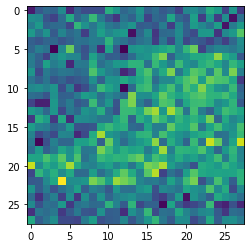

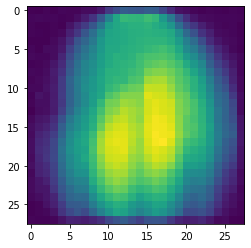

In [43]:
# plot few images

validate_image(decoded_images)